###### Content under Creative Commons Attribution License CC BY 4.0, code under BSD 3 - Clause License © 2020 Andrea Mandanici, Marco Guarnera, Giuseppe Mandaglio, Giovanni Pirrotta.

# Viaggio in ascensore

&nbsp;

### Esperimento sul moto 1D e analisi dati

Il movimento di un ascensore è un esempio di moto 1D. Obiettivo di questo esempio è quello di studiare la posizione, la velocità e l'accelerazione in funzione del tempo.

### Descrizione

La posizione dell'ascensore lungo la direzione verticale può essere registrata tramite una App per smartphone ([**phyphox**](https://phyphox.org/)).
L'applicazione misura la pressione atmosferica e calcola le variazioni di quota rispetto alla posizione iniziale, utilizzando un opportuno algoritmo.

1. Si effettua un esperimento, registrando i valori di quota in funzione del tempo.

2. I dati vengono memorizzati in un file di testo (*Tab separated values*) che ha la seguente struttura:

| Tempo (s)     | Pressione (hPa) | Altezza (m)    | Xxxxxx | Xxxxxx |
| :------------ | :-------------- | :------------- | :----- | :----- |
| 1.002612265E0 | 1.013205700E3   | 0.000000000E0  | XXXXXX | XXXXXX |
| 2.003274159E0 | 1.013197046E3   | 7.205260740E-2 | XXXXXX | XXXXXX |

3. A noi interessa leggere i dati della prima colonna e della terza colonna, per ottenere una **tabella oraria** del moto che vogliamo studiare, cioè un insieme di dati organizzati nel modo seguente:

| Tempo (s)     | Altezza (m)    |
| :------------ | :------------- |
| 1.002612265E0 | 0.000000000E0  |
| 2.003274159E0 | 7.205260740E-2 |

4. Si vuole ottenere innanzitutto una rappresentazione grafica dei dati, basandoci sul modulo [MatPlotLib](https://matplotlib.org/) di Python.

5. Si vogliono analizzare i dati per ottenere i valori di velocità in funzione del tempo.

6. Si vuole rappresentare graficamente l'andamento della velocità in funzione del tempo.

7. Salvare i grafici e i risultati dell'analisi dati in un file.

8. Discutere i risultati.

9. Calcolare i valori dell'accelerazione in funzione del tempo e confrontarli con i valori di accelerazione misurati simultaneamente da un altro sensore (accelerometro) con la stessa App.

10. Valutare insieme i risultati ottenuti riportando in un'unica figura i grafici di altezza, velocità e accelerazione.

##### 1. Esperimento

Installare sullo smartphone l'applicazione [phyphox](https://phyphox.org/)) e tra i menù disponibili scegliere sotto la voce **Vita quotidiana** l'esperimento **Ascensore**. Tasto **play** per iniziare la misura.

<div id = "immagine">

<img src = "Immagini/Phyphox.png" alt = "Immagine">

</div>

N.B. Servirà un ascensore.

&nbsp;

##### 2. Salvare i dati

Dal tasto con i tre puntini verticali in alto a destro dello schermo dello smartphone scegliere **Esporta dati** e scegliere il formato preferito dei dati: per questo esempio scegliamo **CSV(Tabulator, decimal point)**
Una volta salvato il file dati si può trasferire dallo smartphone al computer, per i passi successivi dell'esperimento.

| Dati disponibili  |
| :---------------- |
| Trip01-Height.csv |
| Trip02-Height.csv |
| Trip03-Height.csv |

##### 3. 4. Leggere i dati e rappresentarli in un grafico

Per leggere i dati e rappresentarli in grafico utilizziamo i moduli [numpy](nupmy.org) e [matplotlib]() di Python.
Il codice che utilizziamo è basato su esempi descritti in [1](https://physics.nyu.edu/pine/pymanual/html/pymanMaster.html), [2](http://stacks.iop.org/PhysED/55/033006/mmedia) e [3](https://github.com/POSS-UniMe/RCwithRPi).

Per la lettura del file di testo utilizziamo la funzione **loadtxt** del modulo **numpy** con l'opzione **skiprows**, che permette di saltare le prime $ n $ righe, e con l'opzione **usecols**, che permette di selezionare le colonne che vogliamo leggere (rif. [4](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html))

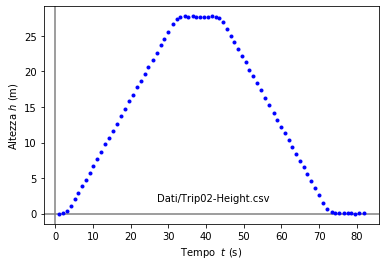

In [33]:
# Utilizzato per importare la libreria adoperata per funzioni matematiche.
import numpy as np
# Utilizzato per importare la libreria adoperata per rappresentare graficamente le grandezze.
import matplotlib.pyplot as plt

# Da controllare.
def grafico(dimx, dimy, x, y, tit, xlab, ylab):
    plt.figure(figsize = (dimx, dimy))
    plt.plot(x, y, marker = "o", markersize = 5, markeredgecolor = "red", markerfacecolor = "red", linestyle = "-", linewidth = 1,
             color = "black")
    plt.title(tit)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid(True)
    plt.show()

inputDataFile = "Dati/Trip02-Height.csv"

# Utilizzato per leggere i dati da file.
t, x = np.loadtxt(inputDataFile, skiprows = 1, usecols = (0, 2), unpack = True)

# Utilizzato per rappresentare graficamente i dati.
plt.plot(t, x, "o", color = "blue", markersize = 3)
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.xlabel("Tempo  $ t $ (s)")
plt.ylabel("Altezza $ h $ (m)")
plt.text(27, 1.8, inputDataFile)

#plt.savefig("height_vs_time.pdf")
print()
plt.show()

##### 5. Calcolare la velocità

La velocità media in ciascun intervallo di tempo del tipo $ [t_1, t_2] $ viene calcolata in base alla semplice relazione:

<div id = "colorbox">

$$ v = \dfrac{\Delta x}{\Delta t} $$

</div>

Ed associamo questo valore $ v_1 $ al tempo $ t'_1 $ ottenuto come valore medio tra $ t_1 $ e $ t_2 $.

Per calcolare gli spostamenti $ \Delta x $ e la durata degli intervalli di tempo $ \Delta t $ tra due misure successive utilizziamo la funzione [**diff()**](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) del modulo **numpy**.

I valori calcolati vengono scritti sul file di testo **speedDataFile** formato da due colonne: la prima colonna contiene i valori di tempo, la seconda contiene i valori di velocità.

Per effettuare i calcoli e memorizzare i dati su file, aggiungiamo alcune righe di codice allo script precedente.

In [34]:
speedDataFile = "Dati/Trip02-Speed.csv"
np.set_printoptions(precision = 20)
delta_t = np.diff(t)
delta_x = np.diff(x)
v = delta_x / delta_t
t_prime = t[:-1] + (delta_t / 2)
np.savetxt(speedDataFile, np.column_stack((t_prime, v)))

##### 6. Grafico della velocità in funzione del tempo

Per produrre un grafico della velocità in funzione del tempo utilizziamo la libreria Matplotlib.

Riportiamo nel grafico il nome del file in cui sono scritti i valori delle variabili tempo e velocità.

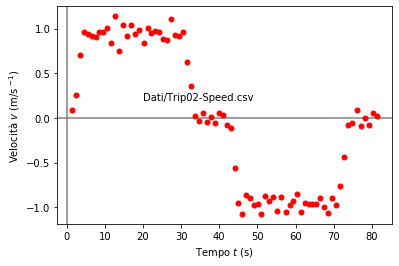

In [35]:
plt.plot(t_prime, v, "o", color = "red", markersize = 5)
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.xlabel("Tempo $ t $ (s)")
plt.ylabel("Velocità $ v $ (m/s $^{-1} $)")
plt.text(20, 0.2, speedDataFile)
plt.draw()
print()
plt.show()

##### 7. Grafico cumulativo di altezza e velocità

Vogliamo riportare insieme i due grafici precedenti, a scopo di confronto.

Produciamo una figura in cui i due grafici sono distribuiti in due righe e una colonna, utilizzando la funzione **subplot** del modulo **matplotlib** (v.rif. [5](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/subplot.html), [6](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html))

Text(20, 0.2, 'Dati/Trip02-Speed.csv')

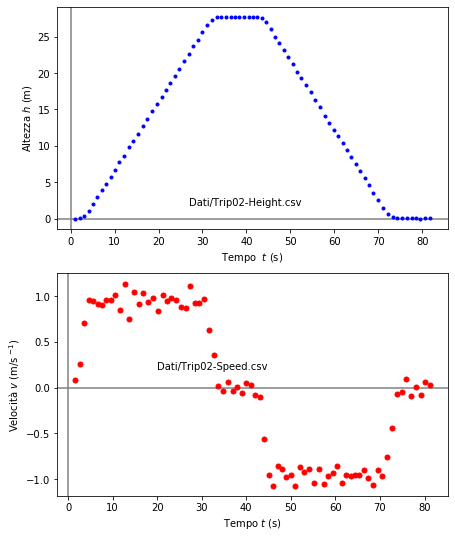

In [36]:
fig = plt.figure(figsize = (7, 9))

plt.subplot(2, 1, 1)
plt.plot(t, x, "o", color = "blue", markersize = 3)
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.xlabel("Tempo  $ t $ (s)")
plt.ylabel("Altezza $ h $ (m)")
plt.text(27, 1.8, inputDataFile)

plt.subplot(2, 1, 2)
plt.plot(t_prime, v, "o", color = "red", markersize = 5)
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.xlabel("Tempo $ t $ (s)")
plt.ylabel("Velocità $ v $ (m/s $^{-1} $)")
plt.text(20, 0.2, speedDataFile)

##### 8. Analisi dei dati

##### 8.1 Inserire un marker nel grafico

Vogliamo inserire nel grafico alcuni **marker** che ci permettano di individuare un certo intervallo di tempo.
Stiamo supponendo che i dati siano già ordinati secondo i tempi in ordine crescente.

Il numero di coppie (tempo $ t $, altezza $ h $) è dato dalla dimensione dell'array di numpy corrispondente. Per esempio:

In [37]:
np.size(t)

79

Si vuole scegliere un sottoinsieme dei dati, per tempi compresi tra quello corrispondente al **MarkerOne** e quello corrispondente al **MarkerTwo**.

I valori dei due marker vengono scelti usando gli **slider** e vengono rappresentati anche nei grafici tramite rette verticali colorate.


Marker One =  0 Marker Two =  0 

Tempo 1 1.000056647 s Tempo 2 =  1.000056647 



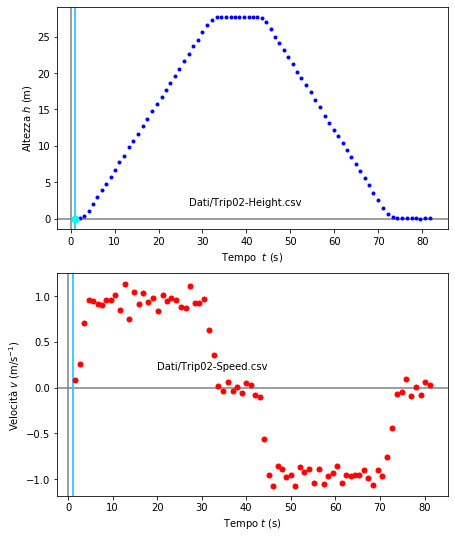

<function __main__.calculate(MarkerOne, MarkerTwo)>

In [38]:
# Utilizzato per importare la libreria adoperata per i widgets.
import ipywidgets as widgets


# Utilizzato per creare due sliders (widgets) adoperati per cambiare interattivamente il valore dei marker.
sliderMarkerOne = widgets.IntSlider(min = 0, max = (np.size(t) - 1), step = 1, value = 0, continuous_update = False)
sliderMarkerTwo = widgets.IntSlider(min = 0, max = (np.size(t) - 1), step = 1, value = 0, continuous_update = False)

def calculate(MarkerOne, MarkerTwo):
    print()
    print("Marker One = ", MarkerOne, "Marker Two = ", MarkerTwo, "\n")
    MarkerOneTime = t[MarkerOne]
    MarkerTwoTime = t[MarkerTwo]
    print("Tempo 1", MarkerOneTime, "s", "Tempo 2 = ", MarkerTwoTime, "\n")
    makeplots(MarkerOne, MarkerTwo)
    t_subset = t[MarkerOne:MarkerTwo]
    x_subset = x[MarkerOne:MarkerTwo]

def makeplots(MarkerOne, MarkerTwo):
    fig = plt.figure(figsize = (7, 9))
    #plt.ion()
    plt.subplot(2, 1, 1)
    plt.plot(t, x, "o", color = "blue", markersize = 3)
    plt.plot(t[MarkerOne], x[MarkerOne], "o", color = "red", markersize = 6)
    plt.plot(t[MarkerTwo], x[MarkerTwo], "o", color = "cyan", markersize = 7)
    plt.axhline(color = "gray", zorder = -1)
    plt.axvline(color = "gray", zorder = -1)
    plt.axvline(color = "magenta", x = t[MarkerOne], zorder = -1)
    plt.axvline(color = "cyan", x = t[MarkerTwo], zorder = -1)
    plt.xlabel("Tempo  $ t $ (s)")
    plt.ylabel("Altezza $ h $ (m)")
    plt.text(27, 1.8, inputDataFile)

    plt.subplot(2, 1, 2)
    plt.plot(t_prime, v, "o", color = "red", markersize = 5)
    plt.axhline(color = "gray", zorder = -1)
    plt.axvline(color = "gray", zorder = -1)
    plt.axvline(color = "magenta", x = t[MarkerOne], zorder = -1)
    plt.axvline(color = "cyan", x = t[MarkerTwo], zorder = -1)
    plt.xlabel("Tempo $ t $ (s)")
    plt.ylabel("Velocità $ v $ (m/s$ ^{-1} $)")
    plt.text(20, 0.2, speedDataFile)

# Utilizzato per collegare i widgets alla funzione e per interagire con gli sliders.
widgets.interact(calculate, MarkerOne = sliderMarkerOne, MarkerTwo = sliderMarkerTwo)

###### 8.2 Fit lineare dei dati di x(t) in un intervallo di tempo scelto

Ipotesi: moto uniforme.

Se in un certo intervallo di tempo il moto è uniforme, comunque scelti due istanti di tempo, $ t_1 $ e $ t_2 $ in tale intervallo, il rapporto $ (x_2 - x_1) / (t_2 - t_1) $ è costante ed uguale a $ v $. Se fissiamo $ t_1 $, per un istante $ t $ generico dovrà essere:

<div id = "colorbox">

$$ \dfrac{x - x_1}{t - t_1} = v $$

</div>

Da cui segue:

<div id = "colorbox">

$$ x - x_1 = v \cdot (t - t_1) \hspace{1cm} \text{e quindi} \hspace{1 cm} x = v t + (x_1 - v t_1) $$

</div>

In altri termini, in un intervallo di tempo in cui il moto è uniforme, il grafico di $ x $ in funzione del tempo $ t $ è lineare, ed è descritto da un'equazione del tipo:

<div id = "colorbox">

$$ x = A t + B $$

</div>

I valori dei parametri $ A $ e $ B $ che corrispondono alla retta che meglio approssima i dati sperimentali si ottengono tramite un metodo che minimizza la somma dei quadrati degli scarti tra i valori teorici ed i valori sperimentali misurati. \[[7](https://nbviewer.jupyter.org/github/engineersCode/EngComp1_offtheground/blob/master/notebooks_en/5_Linear_Regression_with_Real_Data.ipynb), [8](https://physics.nyu.edu/pine/pymanual/html/chap7/chap7_funcs.html#example-linear-least-squares-fitting\)].

In [39]:
t_subset = t[sliderMarkerOne.value:sliderMarkerTwo.value]
x_subset = x[sliderMarkerOne.value:sliderMarkerTwo.value]

def LineFit(x, y):
    x_avg = x.mean()
    slope = (y * (x - x_avg)).sum() / (x * (x - x_avg)).sum()
    y_intercept = y.mean() - slope * x_avg
    return slope, y_intercept

v_est, x_intercept = LineFit(t_subset, x_subset)

print("\n Estimated value of the velocity (from the linear fit)")
print("\n v = {0:0.3} m/s \n".format(v_est))
#print("$ x_intercept $", x_intercept, "m", "\n")


 Estimated value of the velocity (from the linear fit)

 v = nan m/s 



C:\Users\Darka\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
C:\Users\Darka\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Darka\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Darka\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys


###### 8.3 Confronto grafico tra i dati sperimentali ed il fit lineare

Costruiamo un grafico in cui oltre ai dati sperimentali è riportato anche l'andamento previsto in un certo intervallo di tempo in caso di moto con velocità costante, utilizzando i valori dei parametri calcolati tramite la procedura di **best-fit** della sezione precedente.

Definiamo alcuni particolari del grafico utilizzando le funzioni:

[plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html),
[linestyle](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle),
[axvline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html),
[legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html).

Infine memorizziamo il grafico in un file utilizzando la funzione:
[savefig](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html) della libreria **matplotlib**.

IndexError: index 0 is out of bounds for axis 0 with size 0

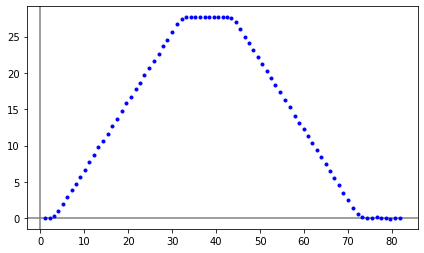

In [40]:
x_fit = v_est * t_subset + x_intercept

v_fit = x_fit / x_fit * v_est

fig = plt.figure(figsize = (7, 9))
#plt.ion()
plt.subplot(2, 1, 1)
plt.plot(t, x, "o", color = "blue", markersize = 3, label = "Dati")
plt.plot(t_subset, x_fit, "-", color = "yellow", linewidth = 3, zorder = -1, label = "Fit")
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.axvline(color = "magenta", x = t_subset[0], linewidth = 1, linestyle = "--", zorder = -1)
plt.axvline(color = "cyan", x = t_subset[-1], linewidth = 1, linestyle = "--", zorder = -1)
plt.xlabel("Tempo  $ t $ (s)")
plt.ylabel("Altezza $ h $ (m)")
plt.text(27, 1.8, inputDataFile)
plt.legend(loc = "upper center", shadow = True, fontsize = "large")

plt.subplot(2, 1, 2)
plt.plot(t_prime, v, "o", color = "red", markersize = 5)
plt.plot(t_subset,v_fit, "-", color = "orange", linewidth = 3)
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.axvline(color = "magenta", x = t_subset[0], linewidth = 1, linestyle = "--", zorder = -1)
plt.axvline(color = "cyan", x = t_subset[-1], linewidth = 1, linestyle = "--", zorder = -1)
plt.xlabel("Tempo $ t $ (s)")
plt.ylabel("Velocità $ v $ (m/s $^{-1} $)")
plt.text(20, 0.2, speedDataFile)
plt.savefig("Dati/height+speed.pdf")

##### 9. Calcolo dell'accelerazione e confronto con i valori misurati

##### 9.1 Calcolo

La situazione è analoga a quella che riguarda il calcolo della velocità media nei vari intervalli di tempo.
L'accelerazione media in ciascun intervallo di tempo del tipo $ [t'_1, t'_2] $ viene calcolata in base alla semplice relazione:

<div id = "colorbox">

$$ a = \dfrac{\Delta v}{\Delta t} $$

</div>

Ed associamo questo valore $ a_1 $ al tempo $ t"_1 $ ottenuto come valore medio tra $ t'_1 $ e $ t'_2 $.

Per calcolare le variazioni di velocità, cioè per calcolare $ \Delta v $ e la durata degli intervalli di tempo $ \Delta t' $ fra due dati successivi usiamo la funzione **numpy.diff()**.

I dati calcolati vengono scritti in un file di testo il cui nome è associato alla variabile **accelerationDataFile**. Il testo è organizzato in due colonne, la prima contenente i valori di tempo, la seconda contenente i valori di accelerazione. Scegliamo il nome del file in modo da evidenziare che si tratta di **valori calcolati** di accelerazione.

In [ ]:
accelerationDataFile = "Dati/Trip02-Acceleration.csv"
np.set_printoptions(precision = 20)
delta_t_prime = np.diff(t_prime)
delta_v = np.diff(v)
a = delta_v / delta_t_prime
t_double_prime = t_prime[:-1] + (delta_t_prime / 2)
np.savetxt(accelerationDataFile, np.column_stack((t_double_prime, a)))

##### 9.2 Grafico

Vogliamo visualizzare l'andamento grafico dell'accelerazione $ a $ in funzione del tempo. Inoltre vogliamo effettuare il confronto con i **valori** di accelerazione **misurati** con un accelerometro. Si tratta di valori misurati mediante un sensore dello smartphone con la stessa App **phyphox** e memorizzati in un file di testo (*Tab separated values*) che ha la seguente struttura:

| Tempo (s)                | Accelerazione ($ m/s^2 $) |
| :----------------------- | :------------------------ |
| 2.003207003250000007e+00 | -9.390230845239912194e-02 |

Il nome del file di testo contenente i dati sperimentali è associato alla variabile **accelerometerDataFile**.

In [ ]:
accelerometerDataFile = "Dati/Trip02-Acceleration.csv"

# Utilizzato per leggere i dati da file.
t_exp, accel = np.loadtxt(accelerometerDataFile, skiprows = 1, unpack = True)

plt.plot(t_double_prime, a, "o", color = "green", markersize = 4, label = "Calculated")
plt.plot(t_exp,accel, "+", color = "black", markersize = 2, label = "Accelerometer")
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.xlabel("Tempo $ t $ (s)")
plt.ylabel("Accelerazione $ a $ (m/s $ ^{-2} $)")
#plt.ylim(-1, 1)
plt.legend(loc = "upper center", shadow = True, fontsize = "large")
plt.draw()
plt.show()

##### Suggerimento

I risultati ottenuti possono essere discussi efficacemente mettendo a confronto questo grafico con il grafico che mostra l'andamento della velocità in funzione del tempo.

##### 10. Confronto tra i grafici di quota, velocità e accelerazione

Produciamo una figura in cui i tre grafici sono distribuiti in tre righe e una colonna, utilizzando la funzione **subplot**. La figura viene memorizzata in un file tramite la funzione **savefig** di Matplotlib.

In [ ]:
print()

fig = plt.figure(figsize = (7, 13))
#plt.ion()
plt.subplot(3, 1, 1)
plt.plot(t, x, "o", color = "blue", markersize = 3, label = "data")
plt.plot(t_subset, x_fit, "-", color = "yellow", linewidth = 3, zorder = -1, label = "fit")
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.axvline(color = "magenta", x = t_subset[0], linewidth = 1, linestyle = "--", zorder = -1)
plt.axvline(color = "cyan", x = t_subset[-1], linewidth = 1, linestyle = "--", zorder = -1)
plt.xlabel("Tempo  $ t $ (s)")
plt.ylabel("Altezza $ h $ (m)")
plt.text(27, 1.8, inputDataFile)
plt.legend(loc = "upper center", shadow = True, fontsize = "large")

plt.subplot(3, 1, 2)
plt.plot(t_prime, v, "o", color = "red", markersize = 5)
plt.plot(t_subset, v_fit, "-", color = "orange", linewidth = 3)
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.axvline(color = "magenta", x = t_subset[0], linewidth = 1, linestyle = "--", zorder = -1)
plt.axvline(color = "cyan", x = t_subset[-1], linewidth = 1, linestyle = "--", zorder = -1)
plt.xlabel("Tempo $ t $ (s)")
plt.ylabel("Velocità $ v $ (m/s)")
plt.text(20, 0.2, speedDataFile)

plt.subplot(3, 1, 3)
plt.plot(t_double_prime, a, "o", color = "green", markersize = 6, label = "Calculated")
plt.plot(t_exp,accel, "d", color = "black", markersize = 3, label = "Accelerometer")
plt.axhline(color = "gray", zorder = -1)
plt.axvline(color = "gray", zorder = -1)
plt.xlabel("Tempo $ t $ (s)")
plt.ylabel("Accelerazione $ a $ ($ m/s^{2} $)")
plt.ylim(-1.5, 1.5)
plt.legend(loc = "upper center", shadow = True, fontsize = "large")
plt.text(10, -1, accelerometerDataFile)

plt.savefig("data/Trip01-Results.pdf")

plt.draw()
plt.show()
print()

Questa figura si può confrontare direttamente con la figura prodotta dall'applicazione **phyphox** e permette di verificare che l'analisi dei dati porti agli stessi risultati.

> Per eseguire il codice Python contenuto in questo **notebook** Jupyter, anche se Python e Jupyter non sono installati sulla macchina che stai adoperando, puoi utilizzare l'ambiente [**binder**](https://mybinder.org) online.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Darkaquon/Physics-with-Open-Source-Software/master?filepath=%2FNotebook%2FViaggio_in_ascensore.ipynb)

### What we have learned

*Python*

* Leggere i dati da un file di testo.

* Riportare i dati in un grafico.

* Salvare i dati calcolati in un file di testo.

* Produrre più grafici in una stessa figura.

* Selezionare un sottoinsieme dei dati.

* Ottenere un fit lineare di un insieme di dati.

* Confrontare diversi set di dati in uno stesso grafico.

* Memorizzare i grafici in un file.

*Fisica*

* Acquisire i dati riguardanti un esperimento con strumentazione portatile (uno smartphone con l'App **phyphox**).

* Elaborare i dati che forniscono la posizione in funzione del tempo e calcolare la velocità e l'accelerazione.

* Studiare il moto considerando l'andamento grafico delle variabili che descrivono posizione, velocità e accelerazione.

### References and notes???

##### Rappresentazione grafica dei dati

1. [Introduction to Python for Science and Engineering](https://physics.nyu.edu/pine/pymanual/html/pymanMaster.html)

2. [Experiments and data analysis on one-dimensional motion with Raspberry Pi and Python](http://stacks.iop.org/PhysED/55/033006/mmedia)

3. [Circuits with Raspberry Pi and Python](https://github.com/POSS-UniMe/RCwithRPi)

4. [Reading data from a text file with **loadtxt**](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)

     * "This function aims to be a fast reader for simply formatted files. The **genfromtxt** function provides more sophisticated handling of, e.g., lines with missing values."

5. [Including more plots in a figure](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/subplot.html)

6. [Multiple plots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) with Matplotlib.

##### Fit lineare dei dati

7. Lorena A. Barba, Natalia C. Clementi, *Linear regression with real data*, [Engineering Computation](https://nbviewer.jupyter.org/github/engineersCode/EngComp1_offtheground/blob/master/notebooks_en/5_Linear_Regression_with_Real_Data.ipynb), GitHub.

8. David J. Pine, *Linear least squares fitting*, [Introduction to Python for Science](https://physics.nyu.edu/pine/pymanual/html/chap7/chap7_funcs.html#example-linear-least-squares-fitting)

##### Funzioni della libreria *matplotlib*

7. [plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

8. [linestyle](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle)

9. [axvline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html)

10. [legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)

11. [savefig](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html)

### Grafica notebook

In [ ]:
# Utilizzato per importare la libreria adoperata per incorporare e visualizzare l'HTML con il Python.
from IPython.core.display import HTML


# Utilizzato per aprire e leggere il file CSS adoperato per modificare la visualizzazione del notebook.
css_file = "Notebook.css"
HTML(open(css_file, "r").read())